# Purpose

Here, we verify the Gaussian Ensemble resonance energy samplers using properties such as nearest-neighbor level-spacing, level-spacing ratio, and Dyson-Mehta $\Delta_3$ metric.

# Importing Modules

In [1]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import TAZ
from TAZ.Theory.LevelSpacingDists import deltaMehta3, deltaMehtaPredict
from TAZ.Theory.distributions import wigner_dist, lvl_spacing_ratio_dist

In [2]:
%matplotlib widget

# Parameters
The Dyson index, β, determines the type of Gaussian ensemble: β = 1 is the Gaussian Orthogonal Ensemble (GOE), β = 2 is the Gaussian Unitary Ensemble (GUE), and β = 4 is the Gaussian Symplectic Ensemble (GSE). 

In [3]:
beta = 1 # Dyson index
mean_level_spacing = 1.0 # mean level-spacing
energy_bounds = (0.0, 20000.0) # energy limits to sample within
seed = None # random number seed

if beta == 1:
    ensemble = 'GOE'
    print(f'β = {beta}: Gaussian Orthogonal Ensemble (GOE)')
elif beta == 2:
    ensemble = 'GUE'
    print(f'β = {beta}: Gaussian Unitary Ensemble (GUE)')
elif beta == 4:
    ensemble = 'GSE'
    print(f'β = {beta}: Gaussian Symplectic Ensemble (GSE)')
else:
    raise ValueError('The provided Dyson index is invalid. β must be 1, 2, or 4.')

β = 1: Gaussian Orthogonal Ensemble (GOE)


# Verifying Sampler

In [4]:
energies = TAZ.Theory.SampleEnergies(energy_bounds, 1/mean_level_spacing, ensemble=ensemble, seed=seed)

Calculated Dyson-Mehta ∆3 = 1.08118
Predicted Dyson-Mehta ∆3  = 0.99648



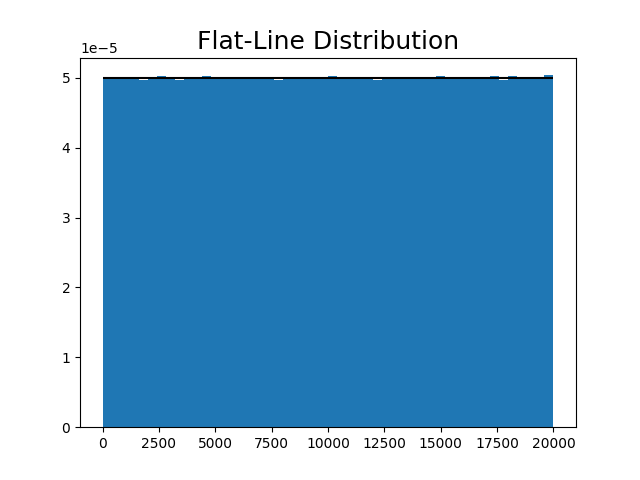

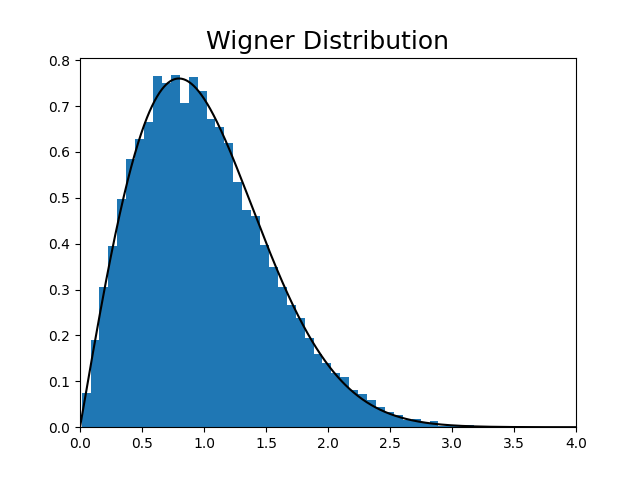

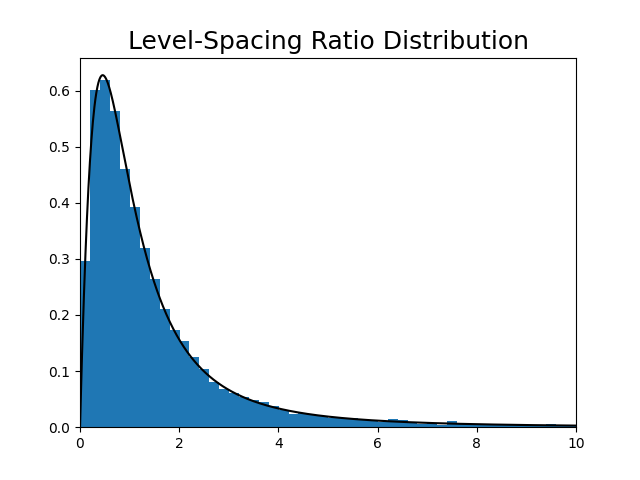

In [5]:
delta_3 = deltaMehta3(energies, energy_bounds)
delta_3_predicted = deltaMehtaPredict(len(energies))
print(f'Calculated Dyson-Mehta ∆3 = {delta_3:.5f}')
print(f'Predicted Dyson-Mehta ∆3  = {delta_3_predicted:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(energies, 50, density=True)
plt.hlines(1/(energy_bounds[1]-energy_bounds[0]), energy_bounds[0], energy_bounds[1], colors='k', linestyles='-')
plt.title('Flat-Line Distribution', fontsize=18)
plt.show()

X_max = 4
level_spacings = energies[1:] - energies[:-1] # level-spacing
X = np.linspace(0, X_max, 1000)
plt.figure(2)
plt.clf()
plt.hist(level_spacings, 50, density=True)
plt.plot(X, wigner_dist(beta=beta).pdf(X), '-k')
plt.xlim(0,X_max)
plt.title('Wigner Distribution', fontsize=18)
plt.show()

X_max = 10
level_spacing_ratios = level_spacings[1:]/level_spacings[:-1] # level-spacing ratios
level_spacing_ratios = level_spacing_ratios[level_spacing_ratios < X_max]
X = np.linspace(0, X_max, 1000)
plt.figure(3)
plt.clf()
plt.hist(level_spacing_ratios, 50, density=True)
plt.plot(X, lvl_spacing_ratio_dist(beta=beta).pdf(X), '-k')
plt.xlim(0,X_max)
plt.title('Level-Spacing Ratio Distribution', fontsize=18)
plt.show()